# Insurance Claim Fraud Detection


In [1]:
#Importing the libraries


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import ARDRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"E:\Anuradha\datatrained\Insurance_fraud.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.shape

(1000, 40)

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df.drop(columns = ["_c39"], axis=1, inplace=True)

In [7]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


194    8
254    7
210    7
101    7
140    7
      ..
312    1
62     1
309    1
308    1
0      1
Name: months_as_customer, Length: 391, dtype: int64

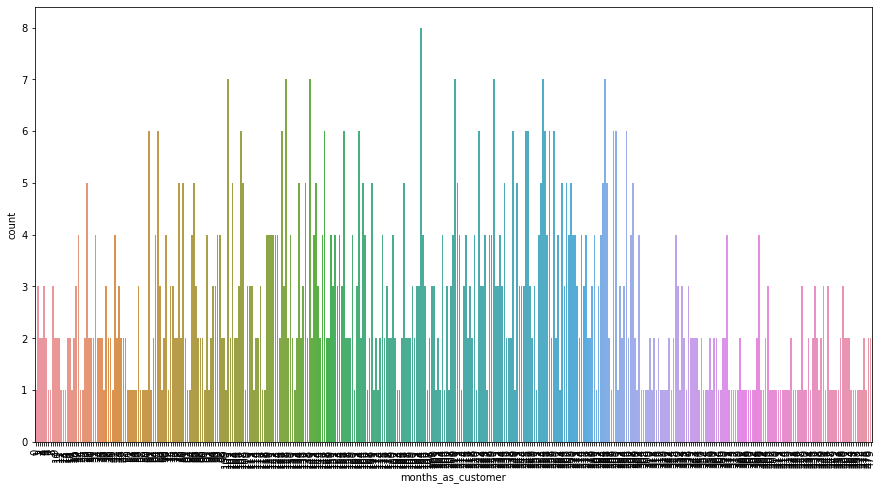

In [8]:
plt.figure(figsize=(15,8))
sns.countplot(x='months_as_customer',data=df)
plt.xticks(rotation=90)
df['months_as_customer'].value_counts()

### Percentage of people who reported fraud cases:

In [9]:
fraud_percent = (df["fraud_reported"].value_counts()/df.shape[0])*100
print(fraud_percent)

N    75.3
Y    24.7
Name: fraud_reported, dtype: float64


#### As per the data approximately 75.3 % of cases are authentic and about 24.7 % of cases are reported as fraud.

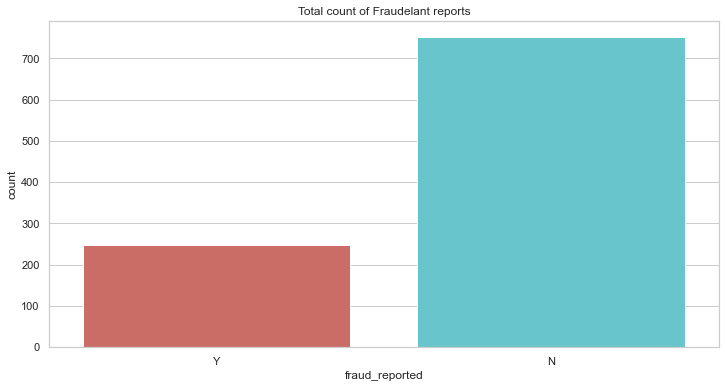

In [10]:
# Fraud Percentage:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="fraud_reported", data=df, palette="hls").set(title='Total count of Fraudelant reports')

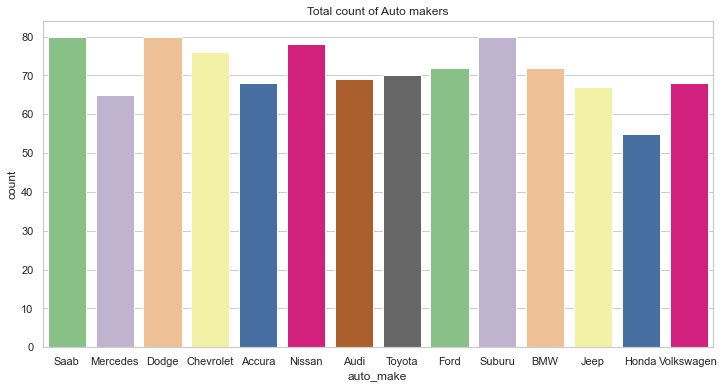

In [11]:
# Auto-mobile maker:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="auto_make", data=df, palette="Accent").set(title='Total count of Auto makers')

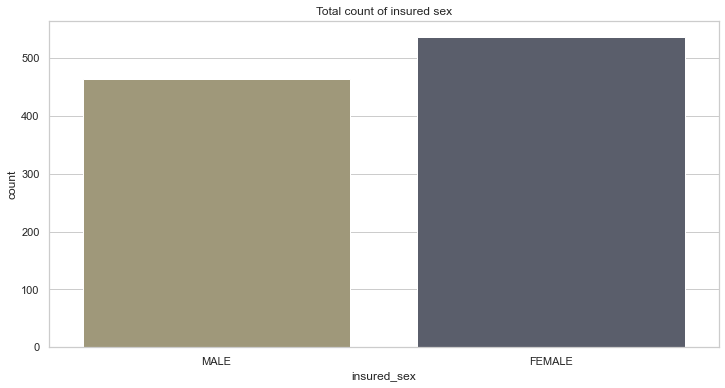

In [12]:
# Insured as per Gender
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="insured_sex",data=df, palette="cividis_r").set(title='Total count of insured sex')

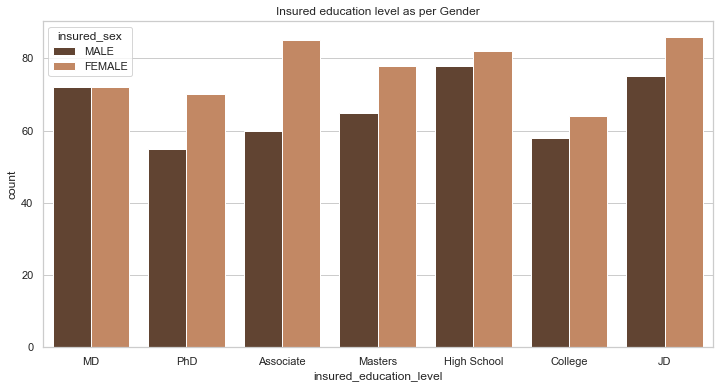

In [13]:
# Relationship between the insured person and education level:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="insured_education_level", hue="insured_sex", data=df, palette="copper").set(title='Insured education level as per Gender')

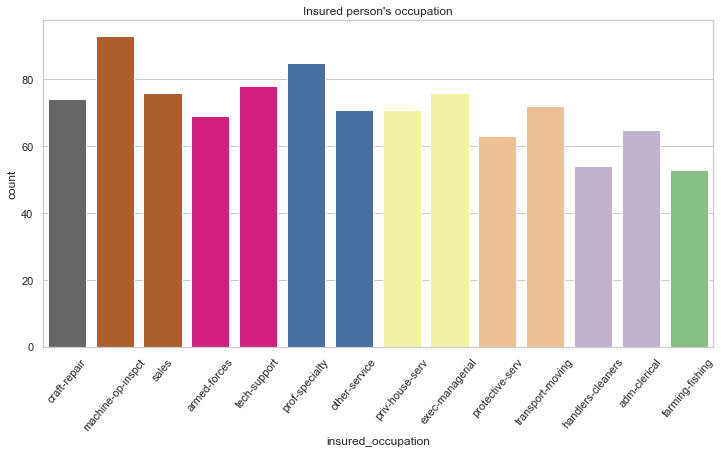

In [14]:
# insured occupation:

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="insured_occupation",data=df, palette="Accent_r").set(title="Insured person's occupation")
plt.xticks(rotation=50)
plt.show()

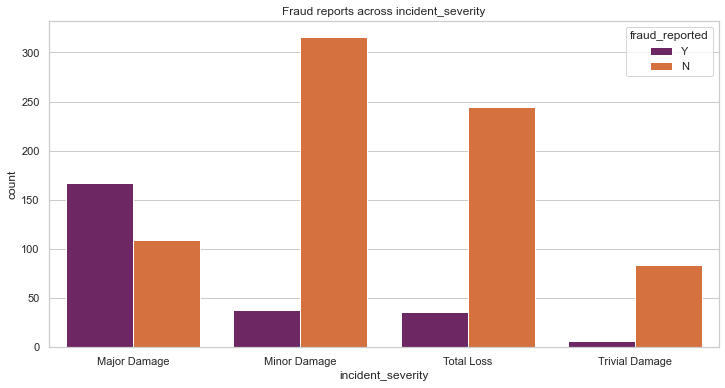

In [15]:
# Fraud reported over the severity of incidents:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="incident_severity", hue="fraud_reported", data=df, palette="inferno").set(title='Fraud reports across incident_severity')

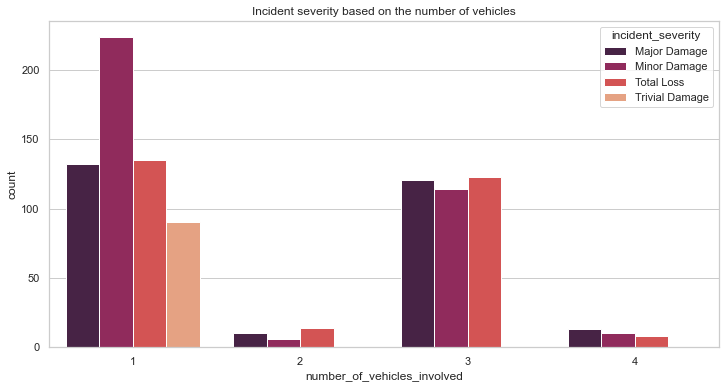

In [16]:
# Relationship between accident severity and number of vehicles involved:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="number_of_vehicles_involved", hue="incident_severity", data=df, palette="rocket").set(title='Incident severity based on the number of vehicles')

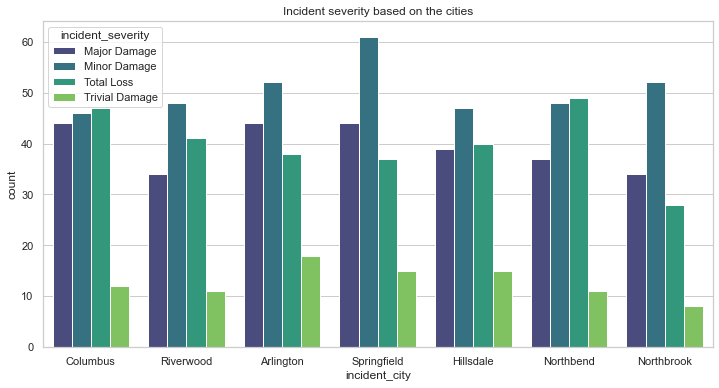

In [17]:
# Incident severity based on the cities
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="incident_city", hue="incident_severity", data=df, palette="viridis").set(title='Incident severity based on the cities')

#### "Columbus" city has highest number of "Major accidents" and Springfield has majority of "Minor accidents"

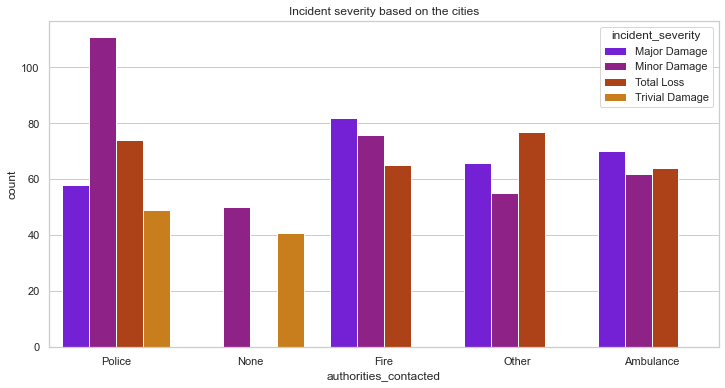

In [18]:
# Relstionship between incident severity and authorities contacted:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="authorities_contacted", hue="incident_severity", data=df, palette="gnuplot").set(title='Incident severity based on the cities')

#### Cases of "Major accident", Fire department was called first. Maybe the vehicle was compromised in such a way causing fire hence fire departments were approached then most contact authorty is "ambulance"

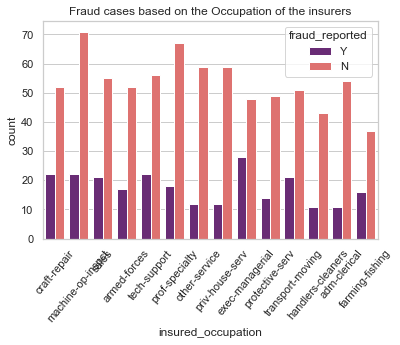

In [19]:
# Majority of people haven't reported false fraud; people fall under occupation "exec-managerial". any fake fraud claimed:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="insured_occupation", hue="fraud_reported", data=df, palette="magma").set(title='Fraud cases based on the Occupation of the insurers')
plt.xticks(rotation=50)
plt.show()

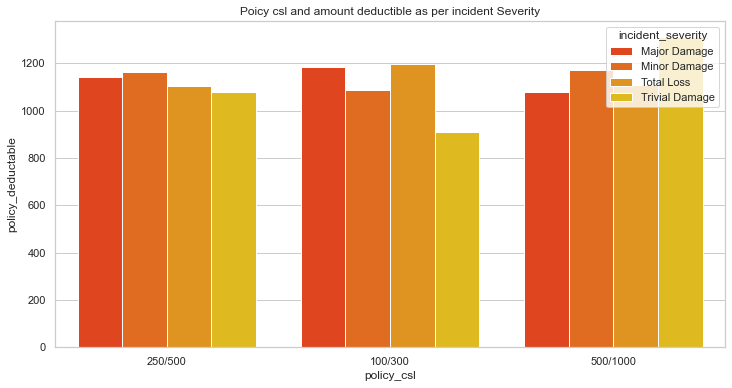

In [20]:
# Poicy csl and amount deductible as per incident Severity:

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="policy_csl", y="policy_deductable", data=df, palette="autumn", hue="incident_severity", ci=None, orient="v").set(title='Poicy csl and amount deductible as per incident Severity')


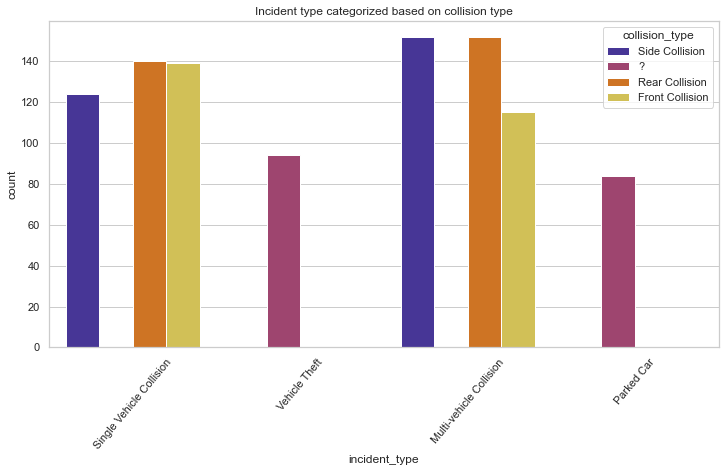

In [21]:
# Relationship between incident type and collision type
#"single vehicle collission" and "multi vehicle collission" has all type of collisions.

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="incident_type", hue="collision_type", data=df, palette="CMRmap").set(title='Incident type categorized based on collision type')
plt.xticks(rotation=50)
plt.show()

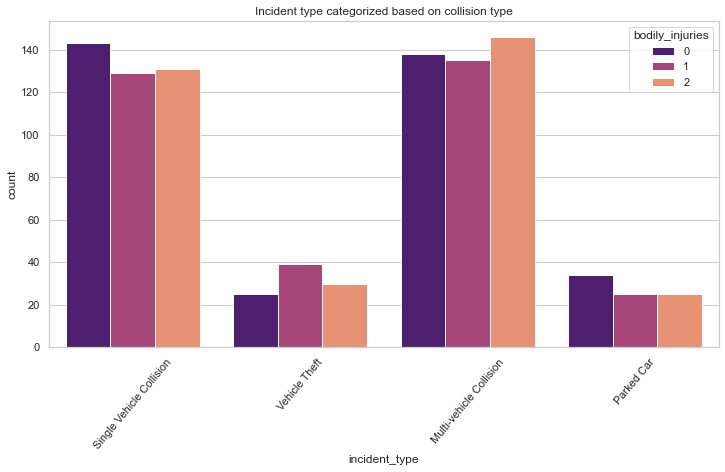

In [22]:
# Relationship between incident types and bodily injuries and in case of "vehicle theft" and "parked car"
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="incident_type", hue="bodily_injuries", data=df, palette="magma").set(title='Incident type categorized based on collision type')
plt.xticks(rotation=50)
plt.show()

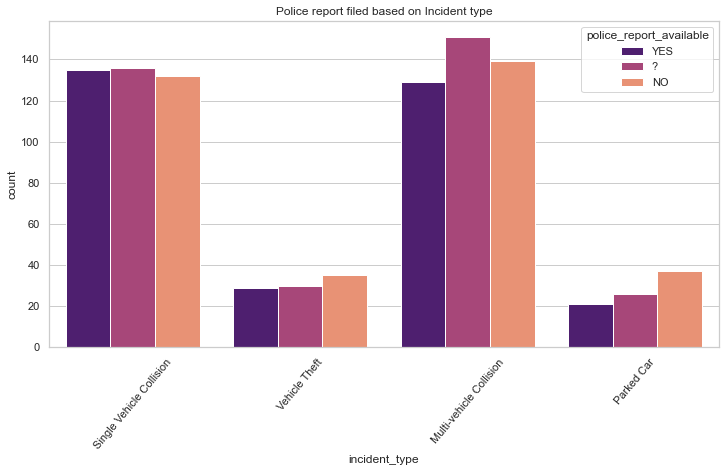

In [23]:
# Relationship between incident type and police report filed; in both "single vehicle collission" and "multiple vehicle collision"
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="incident_type", hue="police_report_available", data=df, palette="magma").set(title='Police report filed based on Incident type')
plt.xticks(rotation=50)
plt.show()

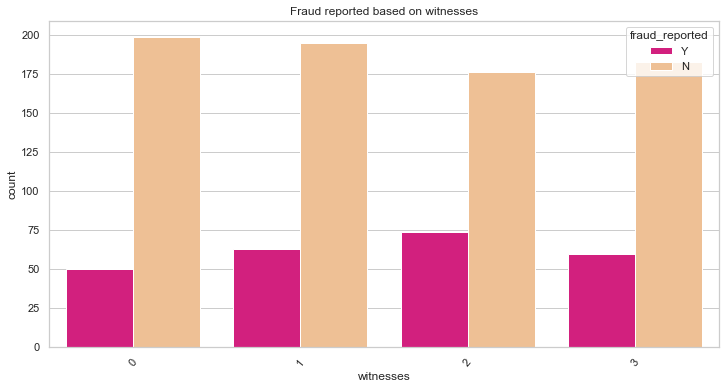

In [24]:
# Relationship between the witnesses and fraud committed or observed, Fraud reporting is not easily possible in all cases
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="witnesses",data=df, palette="Accent_r", hue="fraud_reported").set(title="Fraud reported based on witnesses")
plt.xticks(rotation=50)
plt.show()

[Text(0.5, 1.0, 'Amount claimed based on auto year')]

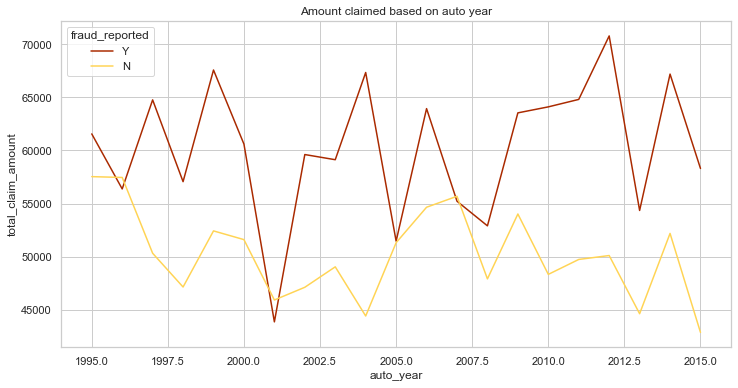

In [25]:
# Relationship between the auto year and total claimed amount:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, x="auto_year", y="total_claim_amount", palette="afmhot", hue="fraud_reported", ci=None).set(title='Amount claimed based on auto year')

### Encoding 

In [26]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

In [28]:
df_new1 = lab_enc.fit_transform(df["policy_bind_date"])
df_new2 = lab_enc.fit_transform(df["policy_state"])
df_new3 = lab_enc.fit_transform(df["policy_csl"])
df_new4 = lab_enc.fit_transform(df["policy_annual_premium"])
df_new5 = lab_enc.fit_transform(df["insured_sex"])
df_new6 = lab_enc.fit_transform(df["insured_education_level"])
df_new7 = lab_enc.fit_transform(df["insured_occupation"])
df_new8 = lab_enc.fit_transform(df["insured_hobbies"])
df_new9 = lab_enc.fit_transform(df["insured_relationship"])
df_new10 = lab_enc.fit_transform(df["incident_date"])
df_new11 = lab_enc.fit_transform(df["incident_type"])
df_new12 = lab_enc.fit_transform(df["collision_type"])
df_new13 = lab_enc.fit_transform(df["incident_severity"])
df_new14 = lab_enc.fit_transform(df["authorities_contacted"])
df_new15 = lab_enc.fit_transform(df["incident_state"])
df_new16 = lab_enc.fit_transform(df["incident_city"])
df_new17 = lab_enc.fit_transform(df["incident_location"])
df_new18 = lab_enc.fit_transform(df["property_damage"])
df_new19 = lab_enc.fit_transform(df["police_report_available"])
df_new20 = lab_enc.fit_transform(df["auto_make"])
df_new21 = lab_enc.fit_transform(df["auto_model"])
df_new22 = lab_enc.fit_transform(df["fraud_reported"])


df["policy_bind_date"] = df_new1
df["policy_state"] = df_new2
df["policy_csl"] = df_new3
df["policy_annual_premium"] = df_new4
df["insured_sex"] = df_new5
df["insured_education_level"] = df_new6
df["insured_occupation"] = df_new7
df["insured_hobbies"] = df_new8
df["insured_relationship"] = df_new9
df["incident_date"] = df_new10
df["incident_type"] = df_new11
df["collision_type"] = df_new12
df["incident_severity"] = df_new13
df["authorities_contacted"] = df_new14
df["incident_state"] = df_new15
df["incident_city"] = df_new16
df["incident_location"] = df_new17
df["property_damage"] = df_new18
df["police_report_available"] = df_new19
df["auto_make"] = df_new20
df["auto_model"] = df_new21
df["fraud_reported"] = df_new22

In [29]:
df.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,732,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,396,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1


## Z-score 

In [30]:
from scipy.stats import zscore

z_score = zscore(df[["policy_deductable", "policy_annual_premium", "umbrella_limit", "capital-gains", "capital-loss",
                    "total_claim_amount", "injury_claim", "property_claim", "vehicle_claim"]])

abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,9.830000e+02,983.000000,...,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,204.315361,38.950153,546143.815870,473.978637,1.018311,0.947101,1136.317396,495.599186,9.888098e+05,500813.196338,...,1.485249,0.976602,52685.798576,7431.617497,7383.713123,37870.467955,6.570702,19.256358,2005.142421,0.245168
std,115.386900,9.182610,257739.467619,275.961420,0.830718,0.804297,610.693463,286.652678,2.118409e+06,71452.237795,...,1.112572,0.808850,26360.841680,4889.687653,4792.825654,18859.272274,4.033570,11.120860,6.016784,0.430406
min,0.000000,19.000000,100804.000000,0.000000,0.000000,0.000000,500.000000,0.000000,-1.000000e+06,430104.000000,...,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,116.000000,32.000000,335264.500000,232.500000,0.000000,0.000000,500.000000,245.500000,0.000000e+00,448451.000000,...,0.500000,0.000000,41695.000000,4275.000000,4470.000000,30200.000000,3.000000,10.000000,2000.000000,0.000000
50%,200.000000,38.000000,533940.000000,472.000000,1.000000,1.000000,1000.000000,496.000000,0.000000e+00,466393.000000,...,1.000000,1.000000,57900.000000,6770.000000,6750.000000,42080.000000,7.000000,20.000000,2005.000000,0.000000
75%,277.500000,44.000000,760439.500000,713.500000,2.000000,2.000000,2000.000000,743.500000,0.000000e+00,603159.000000,...,2.000000,2.000000,70450.000000,11290.000000,10860.000000,50735.000000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,950.000000,2.000000,2.000000,2000.000000,990.000000,7.000000e+06,620962.000000,...,3.000000,2.000000,114920.000000,21450.000000,21810.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


### Correlation:

In [31]:
corr_matrix = df.corr()
corr_matrix["fraud_reported"].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170866
total_claim_amount             0.164599
property_claim                 0.141162
collision_type                 0.106645
injury_claim                   0.089986
policy_bind_date               0.062571
witnesses                      0.049028
number_of_vehicles_involved    0.046389
umbrella_limit                 0.044336
bodily_injuries                0.038257
policy_state                   0.035849
insured_relationship           0.029521
months_as_customer             0.019849
insured_sex                    0.018767
policy_deductable              0.014131
age                            0.012371
insured_zip                    0.012011
insured_education_level        0.010369
auto_year                      0.004198
incident_hour_of_the_day       0.003022
auto_model                    -0.001230
insured_occupation            -0.002201
incident_location             -0.010343
capital-gains                 -0.014713


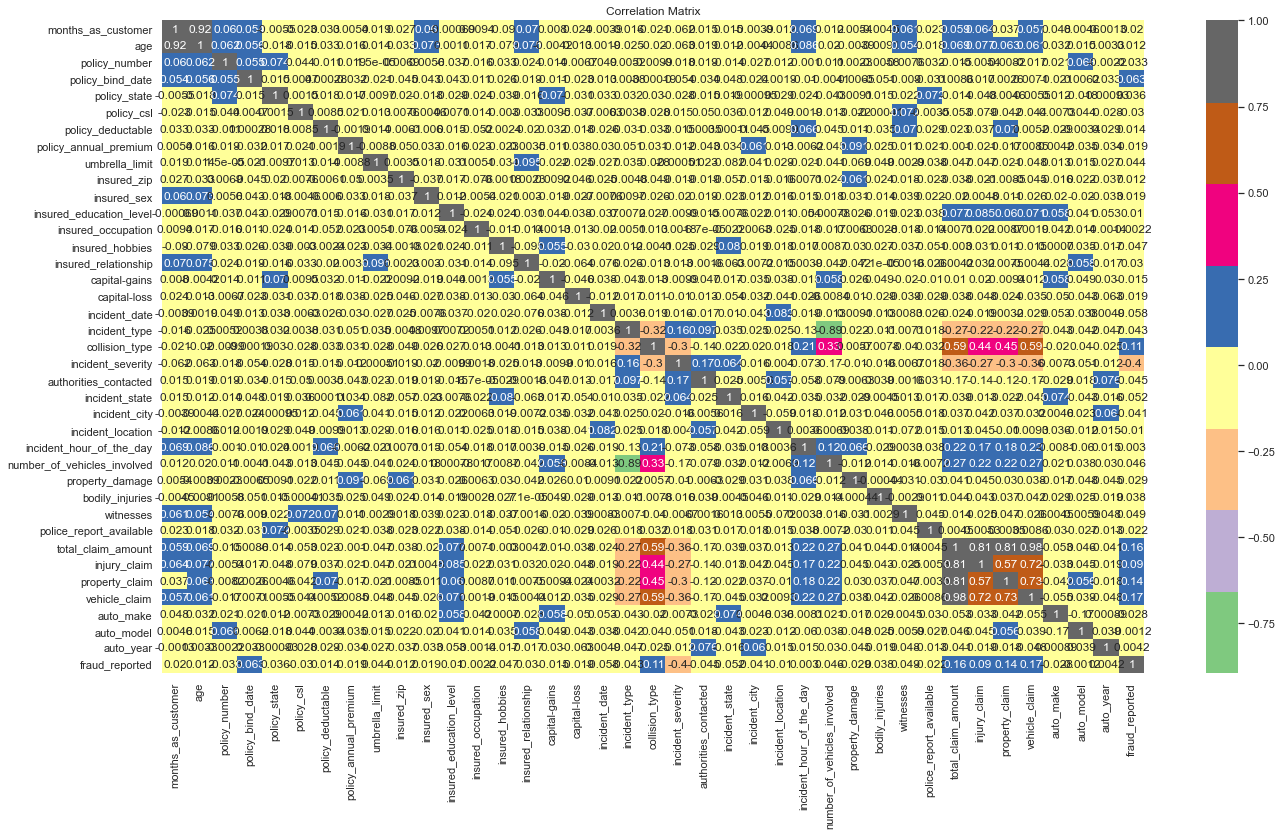

In [32]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_matrix, annot=True, cmap='Accent')
plt.title("Correlation Matrix")
plt.show()

#### skewness:

In [33]:
x = df.drop(columns = ["fraud_reported"], axis=1)
y = df["fraud_reported"]

x.skew()

months_as_customer             0.366978
age                            0.478560
policy_number                  0.039782
policy_bind_date               0.004324
policy_state                  -0.034234
policy_csl                     0.096017
policy_deductable              0.479334
policy_annual_premium         -0.001220
umbrella_limit                 1.806345
insured_zip                    0.831572
insured_sex                    0.140949
insured_education_level        0.004804
insured_occupation            -0.052521
insured_hobbies               -0.061328
insured_relationship           0.078645
capital-gains                  0.469129
capital-loss                  -0.373733
incident_date                  0.003394
incident_type                  0.091084
collision_type                -0.191838
incident_severity              0.280436
authorities_contacted         -0.113368
incident_state                -0.152489
incident_city                  0.048398
incident_location             -0.002770


In [34]:
features = ["policy_deductable", "policy_annual_premium", "umbrella_limit", "capital-gains", "capital-loss",
                    "total_claim_amount", "injury_claim", "property_claim", "vehicle_claim"]

In [35]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [36]:
# StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.07245795,  0.98604365, -0.09533393, ...,  0.85062198,
        -1.64246755, -0.18996904],
       [ 0.20536729,  0.33230203, -0.78908866, ...,  0.35453097,
        -0.65283189,  0.30888999],
       [-0.60969793, -1.08413814,  0.5494938 , ..., -0.63765107,
         0.96657193,  0.30888999],
       ...,
       [-0.64438156, -0.53935346,  1.44549742, ...,  1.09866749,
        -0.02306374, -1.52025979],
       [ 2.19967581,  2.51144076, -0.04737353, ..., -1.38178759,
        -1.28260003, -1.1876871 ],
       [ 2.182334  ,  2.29352689,  0.0385709 , ...,  0.35453097,
        -0.65283189,  0.30888999]])

In [37]:
df["fraud_reported"].value_counts()

0    742
1    241
Name: fraud_reported, dtype: int64

## Train-Test Split:

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state = 200)

## Models Building:

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
# DecisionTreeClassifier:

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7932203389830509
[[188  34]
 [ 27  46]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       222
           1       0.57      0.63      0.60        73

    accuracy                           0.79       295
   macro avg       0.72      0.74      0.73       295
weighted avg       0.80      0.79      0.80       295



In [43]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7661016949152543
[[208  14]
 [ 55  18]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       222
           1       0.56      0.25      0.34        73

    accuracy                           0.77       295
   macro avg       0.68      0.59      0.60       295
weighted avg       0.73      0.77      0.73       295



In [44]:
# ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier

ex_reg = ExtraTreesClassifier()
ex_reg.fit(x_train,y_train)

y_pred = ex_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7661016949152543
[[213   9]
 [ 60  13]]
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       222
           1       0.59      0.18      0.27        73

    accuracy                           0.77       295
   macro avg       0.69      0.57      0.57       295
weighted avg       0.73      0.77      0.72       295



## Cross-validation

In [46]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(dt, x, y, cv=5)
print("Cross Validation score of DecisionTree model is:", scr.mean())

scr = cross_val_score(rf, x, y, cv=5)
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())


scr = cross_val_score(ex_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreesRegressor model is:", scr.mean())

Cross Validation score of DecisionTree model is: 0.7762353672433442
Cross Validation score of RandomForestRegressor model is: 0.7802755620014503
Cross Validation score of ExtraTreesRegressor model is: 0.7640111882316379


### ROC & AOC

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [48]:
# Scores :

print('ROC_AUC_SCORE_ExtraTrees_REGRESSION :',roc_auc_score(y_test, ex_reg.predict(x_test)))

print('ROC_AUC_SCORE_RANDOM_FOREST :',roc_auc_score(y_test, dt.predict(x_test)))

print('ROC_AUC_SCORE_DECISION_TREE :',roc_auc_score(y_test, rf.predict(x_test)))

ROC_AUC_SCORE_ExtraTrees_REGRESSION : 0.5687708256201407
ROC_AUC_SCORE_RANDOM_FOREST : 0.7384919165741083
ROC_AUC_SCORE_DECISION_TREE : 0.5917561397013452


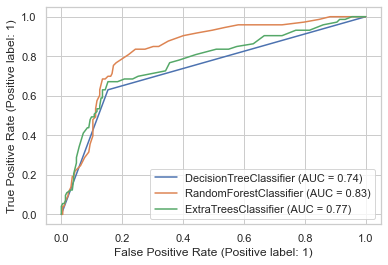

In [49]:
disp = plot_roc_curve(dt, x_test, y_test)

plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)

plot_roc_curve(ex_reg, x_test, y_test, ax=disp.ax_)

plt.legend(prop={"size":11}, loc="lower right")

plt.show()

### Hyper-Parameter tuning:

In [52]:
parameters = {"criterion":["gini", "entropy"],
              "splitter":["best", "random"],
              "max_features":["auto", "sqrt", "log2"],
              "random_state":[50, 100, 150, 200, 250, 300],
              "min_samples_split":[1, 2, 3, 4, 5, 6],
              "min_samples_leaf":[1, 2, 3, 4, 5, 6]
              }

In [57]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


## New Model:

In [58]:
mod_rf_class = DecisionTreeClassifier(criterion= "entropy", max_features= "auto", min_samples_leaf= 5, min_samples_split= 2, random_state= 150, splitter= "random")

mod_rf_class.fit(x_train,y_train)
pred = mod_rf_class.predict(x_test)
print(accuracy_score(y_test,pred)*100)

76.94915254237287


In [59]:
# Saving the model

import joblib
joblib.dump(mod_dt_class,"Insurance_Claim_Fraud.pkl")

['Insurance_Claim_Fraud.pkl']

In [60]:
model = joblib.load("Insurance_Claim_Fraud.pkl")

prediction = model.predict(x_test)

prediction=pd.DataFrame(prediction)
prediction

,0
0,0
1,0
2,0
3,0
4,0
...,...
290,0
291,0
292,0
293,1
